# Exploring Bitcoin Price Data


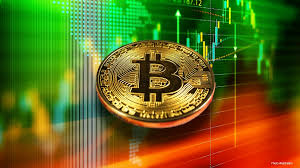


## ***Unveiling Bitcoin's Journey: A New Era Begins***


While Ethereum, BNB Chain, and Solana are gaining attention, Bitcoin's enduring market dominance is evident. Despite a decrease from its peak of 60-70% dominance, Bitcoin remains a force to be reckoned with. This speaks to the strong belief of Bitcoin HODLers, highlighting its position as a robust digital currency rather than an expansive platform like Ethereum.
Bitcoin's limited smart contract capacity and evolving security model have sparked debates. Miners rely on rewards and transaction fees, but the sustainability of the latter is uncertain given Bitcoin's primary use for asset transfers.

In this article, we will delve into how Bitcoin thrives as a store of value, centering our analysis on its price.

Our outline will be the following:



*   Download the dataset
*   Data preparation and cleaning
*   Exploratory analysis and visualization
*   Questions and Answers
*   Summary and Conclusion


To analyze Bitcoin's price, we will be utilizing the Bitcoin Price Dataset (2017-2023), which includes Bitcoin price data from 2017 to 2023.

We derived our source data set from Kaggle https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset



In [51]:
!pip install jovian --upgrade --quiet

# Download the dataset

*Firstly, let us import the necessary libraries*

In [52]:
pip install opendatasets --upgrade --quiet


*Next we will load the dataset.

In [53]:

import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset'
od.download(download_url)

Skipping, found downloaded files in "./bitcoin-price-dataset" (use force=True to force download)


In [54]:
data_filename = './bitcoin-price-dataset/bitcoin_2017_to_2023.csv'


# Data preparation & cleaning

*We will be using the following steps to prepare the data*

1. Load file using Pandas
2. Look at some information about the files
3. Fix any missing or incorrect values

*First the data is cleaned. We observed that there were no missing values within the data set and we didnt have to drop any records with missing values*



In [55]:
import pandas as pd

In [56]:
df = pd.read_csv (data_filename)

In [57]:
df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611
...,...,...,...,...,...,...,...,...,...,...
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000


*Let's view some basic information about the data frame*

In [58]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

In [59]:
len(df.columns)

10

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [61]:
df.shape

(3126000, 10)

*Let's now view some basic statistics about the the numeric columns.*

In [62]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


In [63]:
numerics = ['int16', 'int32', 'int64','float16','float32','float64']
numeric_df= df.select_dtypes(include=numerics)
len(numeric_df.columns)

9

In [64]:
df.isna()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3125995,False,False,False,False,False,False,False,False,False,False
3125996,False,False,False,False,False,False,False,False,False,False
3125997,False,False,False,False,False,False,False,False,False,False
3125998,False,False,False,False,False,False,False,False,False,False


*Percentage of missing values per column*

In [65]:
df.isna().sum().sort_values(ascending=True)

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

Lets convert unix time to datetime

*Number of null columns in each column*

In [66]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

There are no null values



The columns we'll analyze and take a closer look at are:
1. Timestamp
2. Open
3. High
4. Low
5. Close
6. Volume


In [67]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')

First we would like to look at the dates the data encompasses

In [68]:
df['timestamp'].min(), df['timestamp'].max()


('2017-08-17 04:00:00', '2023-08-01 13:19:00')

This shows us the date range was from August 17th 2017 to August 1st 2023

Lets take a look at date ranges sorted yearly

In [69]:
df_2017 = df[(df['timestamp'] > '2017-08-17 04:00:00') & (df['timestamp'] <= '2017-12-31 23:59:59')]
df_2018 = df[(df['timestamp'] > '2018-01-01 00:00:01') & (df['timestamp'] <= '2018-12-31 23:59:59')]
df_2019 = df[(df['timestamp'] > '2019-01-01 00:00:01') & (df['timestamp'] <= '2019-12-31 23:59:59')]
df_2020 = df[(df['timestamp'] > '2020-01-01 00:00:01') & (df['timestamp'] <= '2020-12-31 23:59:59')]
df_2021 = df[(df['timestamp'] > '2021-01-01 00:00:01') & (df['timestamp'] <= '2021-12-31 23:59:59')]
df_2022 = df[(df['timestamp'] > '2022-01-01 00:00:01') & (df['timestamp'] <= '2022-12-31 23:59:59')]
df_2023 = df[(df['timestamp'] > '2023-01-01 00:00:01') & (df['timestamp'] <= '2023-08-01 13:19:00')]

In [70]:
df_2017

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
2929504,2017-12-31 23:59:00,13740.96,13741.00,13697.61,13716.36,4.939606,67726.223108,104,1.135130,15574.920939
2929505,2017-12-31 23:58:00,13734.27,13741.00,13706.61,13740.96,1.014558,13934.594686,59,0.655781,9009.658918
2929506,2017-12-31 23:57:00,13734.29,13741.82,13697.05,13734.27,1.777407,24411.384779,52,1.055802,14507.254521
2929507,2017-12-31 23:56:00,13695.52,13741.81,13668.06,13741.81,3.618499,49613.053398,64,2.825753,38751.842418
2929508,2017-12-31 23:55:00,13685.00,13695.52,13653.76,13695.52,5.565341,76103.822890,63,2.346258,32108.168152
...,...,...,...,...,...,...,...,...,...,...
3125994,2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921


In [71]:
df_2023

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611
...,...,...,...,...,...,...,...,...,...,...
306393,2023-01-01 00:03:00,16536.43,16537.28,16531.00,16533.65,115.71894,1.913268e+06,2956,49.40758,816919.416830
306394,2023-01-01 00:02:00,16539.31,16541.17,16534.52,16536.43,62.90197,1.040248e+06,1930,20.73999,343009.428508
306395,2023-01-01 00:02:00,16539.31,16541.17,16534.52,16536.43,62.90197,1.040248e+06,1930,20.73999,343009.428508
306396,2023-01-01 00:01:00,16543.04,16544.41,16538.48,16539.31,80.45300,1.330773e+06,2890,33.28428,550563.306928


How many trades occured during the period?

In [72]:
Trades = df.number_of_trades.unique()
len(Trades)

18985

In [73]:
Trades[:100]

array([ 258,  317,  451,  483,  686,  389,  266,  500,  274,  381,  188,
        346,  293,  148,  497,  828,  347,  573,  533,  363,  178,  221,
        506,  431,  459,  481,  268,  353,  411,  461,  394,  322,  416,
        487,  554,  491,  340,  721,  788, 1049, 2013, 1027, 2102, 1552,
        910, 1341, 1616, 4857,  933,  383,  320,  690,  425,  631,  578,
        508,  341,  357,  739,  439,  407,  479,  457,  280,  466,  562,
        534,  535,  420,  406,  318,  364,  581, 1238,  775,  456,  219,
        545,  384,  400,  600,  391,  337,  413,  402,  435,  372,  574,
        307,  289,  592,  445,  619,  465,  548,  596,  598,  226,  392,
        292])

In [74]:
Highs = df.high.unique()
len(Highs)

1658845

What were the top 100 highs for the period

In [75]:
Highs[:100]

array([28902.49, 28908.53, 28912.74, 28907.42, 28896.  , 28890.4 ,
       28889.64, 28881.54, 28876.  , 28874.35, 28878.01, 28887.1 ,
       28882.9 , 28875.01, 28875.02, 28878.57, 28879.35, 28894.01,
       28899.55, 28885.59, 28874.  , 28879.4 , 28884.32, 28881.09,
       28882.39, 28892.49, 28901.81, 28904.  , 28892.51, 28891.49,
       28912.35, 28923.99, 28915.  , 28927.5 , 28906.  , 28910.  ,
       28907.17, 28890.  , 28871.62, 28837.24, 28829.08, 28827.92,
       28827.03, 28830.47, 28837.93, 28840.56, 28841.38, 28850.99,
       28852.7 , 28851.11, 28852.  , 28867.1 , 28870.69, 28877.01,
       28870.  , 28858.  , 28854.  , 28859.03, 28871.12, 28877.2 ,
       28878.92, 28882.05, 28879.16, 28858.01, 28871.13, 28865.07,
       28862.19, 28870.77, 28876.61, 28886.01, 28888.4 , 28890.02,
       28892.  , 28889.68, 28883.22, 28883.1 , 28883.29, 28883.55,
       28887.27, 28883.26, 28881.95, 28882.01, 28889.12, 28883.21,
       28878.  , 28878.95, 28880.  , 28873.39, 28875.39, 28879

What were the top 100 highs for each year in the period

In [76]:
Lows = df.low.unique()
len(Lows)

1666834

In [77]:
Lows[:100]

array([28902.48, 28907.41, 28893.03, 28890.39, 28889.63, 28881.53,
       28875.99, 28870.  , 28872.48, 28872.24, 28878.  , 28864.  ,
       28868.33, 28866.24, 28875.01, 28878.56, 28879.34, 28894.  ,
       28885.58, 28873.99, 28871.37, 28868.5 , 28870.64, 28879.39,
       28876.33, 28882.38, 28892.48, 28892.5 , 28890.27, 28890.34,
       28890.17, 28908.  , 28902.88, 28904.01, 28884.01, 28891.17,
       28872.85, 28837.23, 28753.74, 28814.61, 28824.11, 28825.87,
       28822.  , 28830.46, 28830.  , 28832.  , 28836.  , 28838.  ,
       28849.44, 28844.  , 28850.97, 28867.09, 28868.97, 28856.88,
       28853.99, 28849.04, 28850.  , 28859.02, 28871.11, 28877.19,
       28879.15, 28851.99, 28841.07, 28858.  , 28865.06, 28862.18,
       28870.76, 28876.6 , 28884.36, 28888.39, 28889.67, 28883.21,
       28879.82, 28880.65, 28882.  , 28879.81, 28878.02, 28877.99,
       28874.38, 28870.92, 28876.06, 28873.38, 28867.47, 28867.46,
       28873.34, 28879.12, 28881.19, 28890.25, 28892.38, 28900

We can see in the graphs for Open, Close, High, Low across **August 17th 2017** to **August 1st 2023**

Lets look at the Close statistics

In [78]:
Closes = df.close.unique()
len(Closes)

1775966

In [79]:
Closes[:100]

array([28902.49, 28908.53, 28907.41, 28895.99, 28890.39, 28889.64,
       28881.54, 28876.  , 28872.48, 28874.34, 28872.25, 28878.  ,
       28882.89, 28868.34, 28875.  , 28868.  , 28875.01, 28878.57,
       28879.34, 28894.01, 28899.55, 28885.59, 28874.  , 28871.38,
       28870.64, 28879.39, 28881.  , 28876.34, 28882.39, 28892.49,
       28901.52, 28892.51, 28891.48, 28890.35, 28912.35, 28909.96,
       28910.2 , 28905.99, 28894.  , 28903.28, 28879.98, 28889.99,
       28864.01, 28837.23, 28815.  , 28824.12, 28827.03, 28825.87,
       28830.46, 28837.93, 28832.95, 28840.56, 28838.01, 28850.98,
       28849.44, 28851.1 , 28850.97, 28867.09, 28868.98, 28870.  ,
       28856.88, 28858.  , 28853.99, 28854.  , 28859.03, 28871.11,
       28877.2 , 28879.16, 28852.  , 28871.13, 28865.06, 28862.19,
       28862.18, 28870.77, 28876.61, 28886.  , 28888.39, 28890.01,
       28889.67, 28883.21, 28879.82, 28883.1 , 28880.65, 28882.01,
       28883.25, 28881.94, 28882.  , 28883.2 , 28874.39, 28878

In [80]:
df['close'].describe()

count    3.126000e+06
mean     2.008946e+04
std      1.605896e+04
min      2.817000e+03
25%      7.624798e+03
50%      1.170000e+04
75%      2.989957e+04
max      6.900000e+04
Name: close, dtype: float64

In [81]:
df['Return']=df['close'].pct_change()

In [82]:
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,Return
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,NaN
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,0.000000
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,0.000000
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,0.000209
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,-0.000039


In [83]:
import numpy as np

# Exploratory analysis & visualization


The next step is to visualize the data. We can employ various types of plots to view our data relationships.The matplotlib and seaborn libraries will be used to create plots*

It is important to analyze and interpret such historical price data to identify trends, patterns, and potential insights

In [84]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [85]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

**Closing Price**

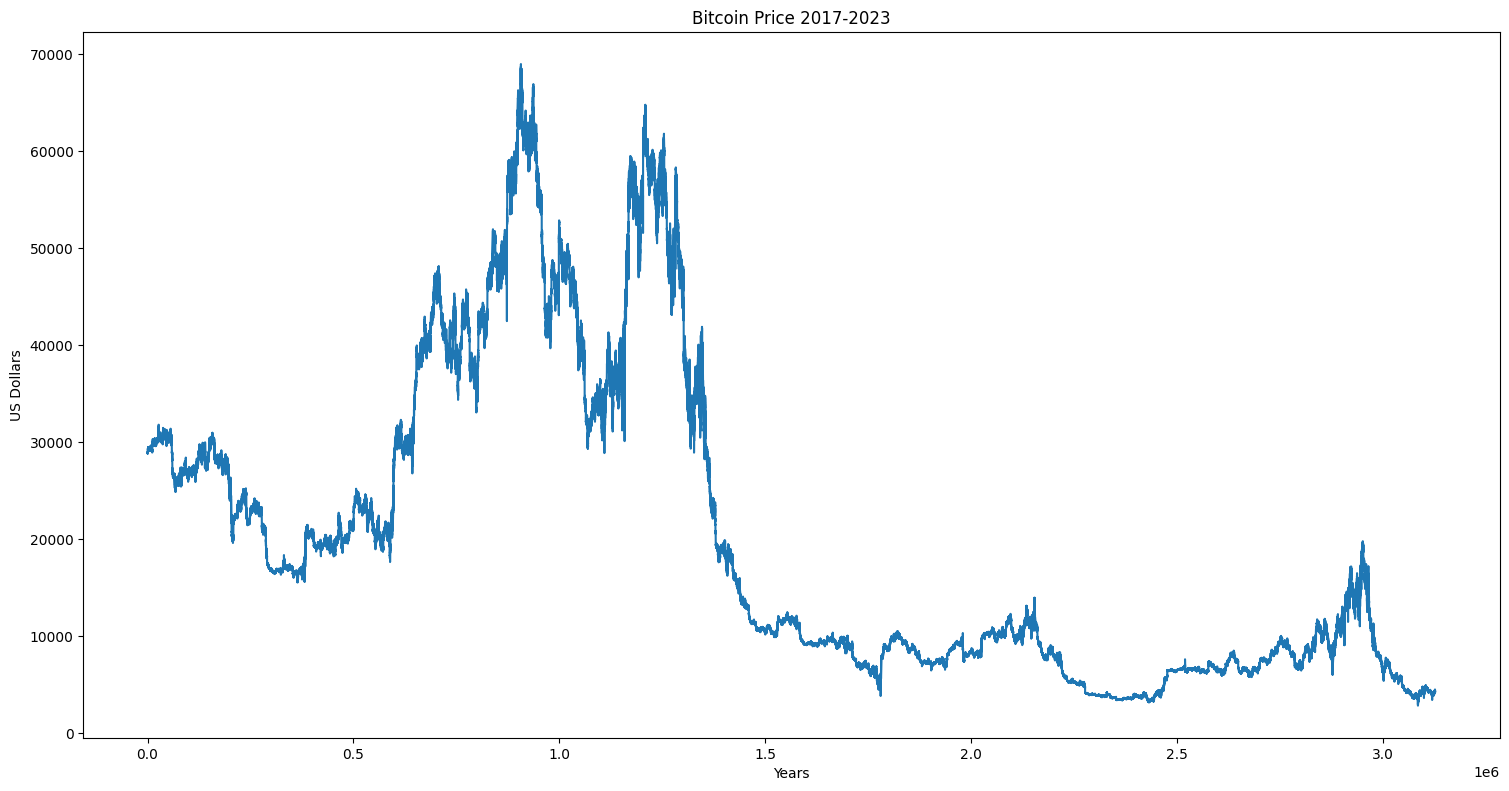

In [86]:
# graph of bitcoin price
df.close.plot(title = "Bitcoin Price 2017-2023", figsize=(15,8))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()


The chart above depicts the closing price of Bitcoin over a span of six years, specifically from August 17th, 2017, to August 1st, 2023


From the plot we can see the closing price has largely decreased since 2017 with some flunctuations


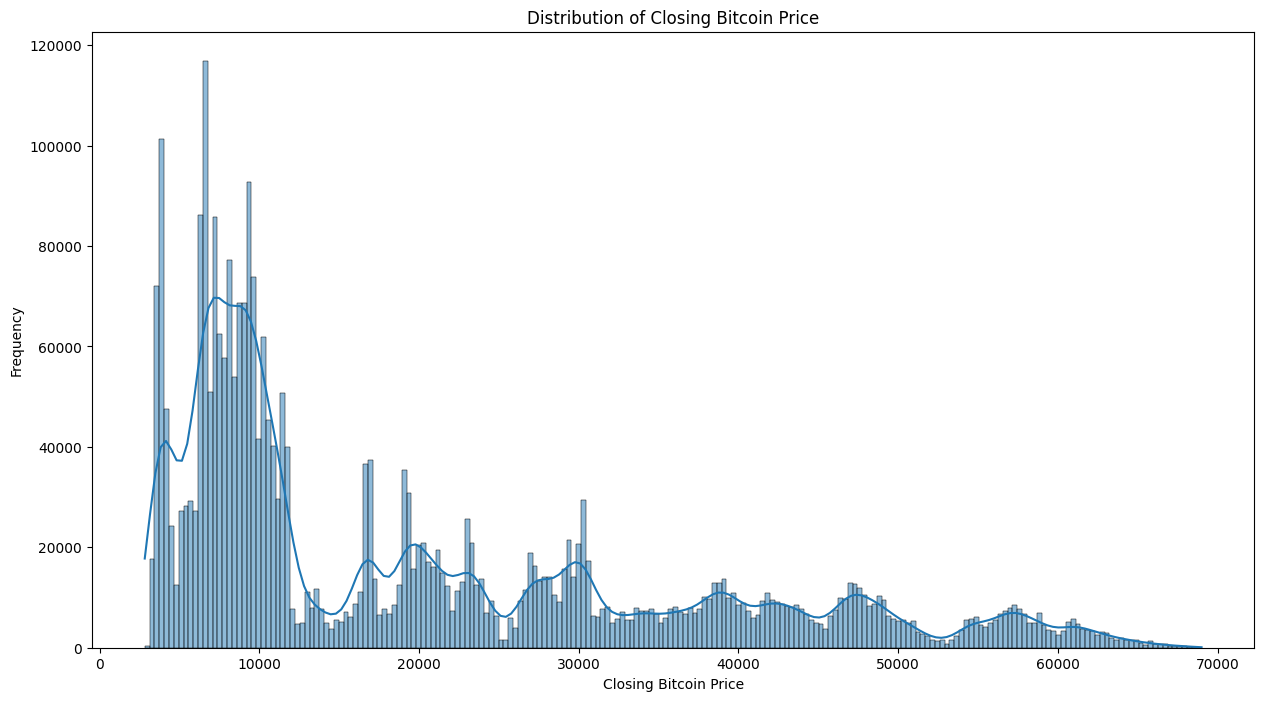

In [87]:
# Distribution of Closing Bitcoin price
plt.figure(figsize=(15, 8))
sns.histplot(df['close'], kde=True)
plt.title('Distribution of Closing Bitcoin Price')
plt.xlabel('Closing Bitcoin Price')
plt.ylabel('Frequency')
plt.show()

The charts above and below depicts the distribution of the closing price of Bitcoin over the same period, specifically from August 17th, 2017, to August 1st, 2023



These charts show that we have had more closing prices below 12,000. It also shows that Bitcoin's all time high was around the 65000 mark

Text(0.5, 1.0, 'Distribution of Closing Bitcoin Price')

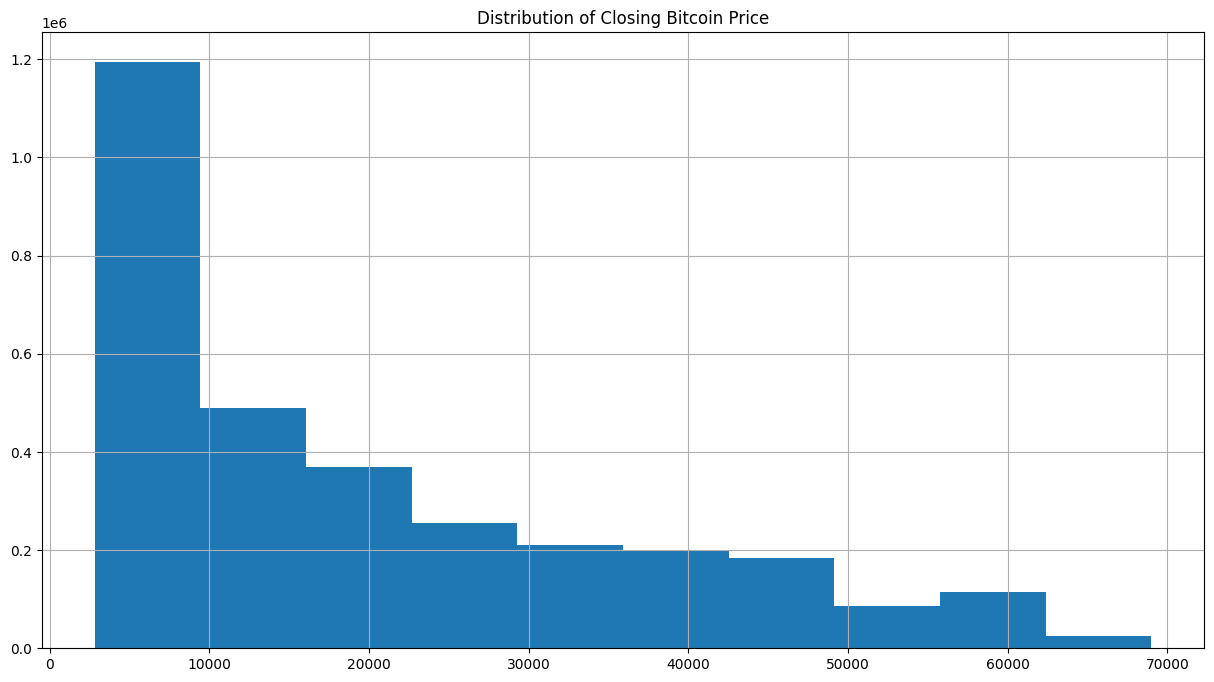

In [88]:
plt.figure(figsize=(15, 8))
df['close'].hist()
plt.title('Distribution of Closing Bitcoin Price')

Text(0.5, 1.0, 'Top Bitcoin prices recorded')

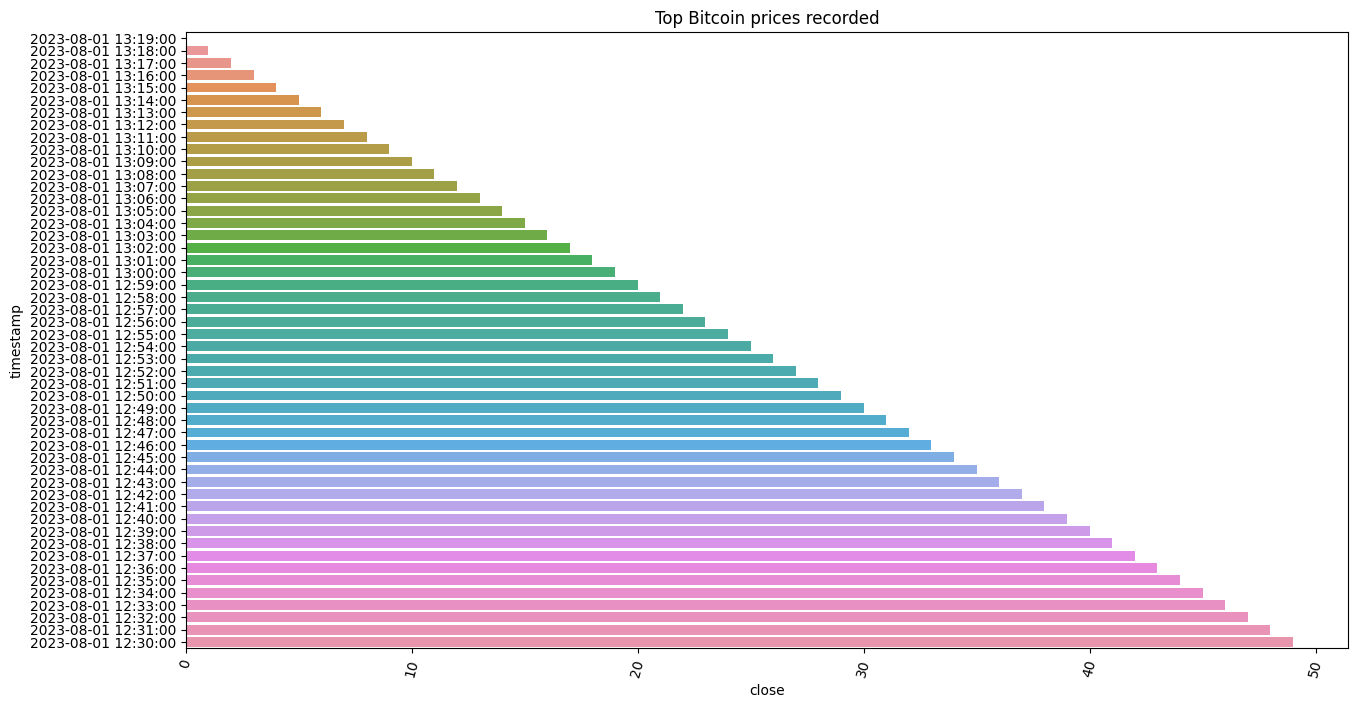

In [89]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
sns.barplot(y=df.timestamp.head(50),x=df.close.head(50).index);
plt.xlabel( "close")

# Set label for y-axis
plt.ylabel( "timestamp" )

# Set title for figure
plt.title( "Top Bitcoin prices recorded" )

**Distribution of Returns**

We will visualize the distribution of returns on Bitcoin by using a seaborn distplot. This plot will help us understand how returns are distributed across different values.


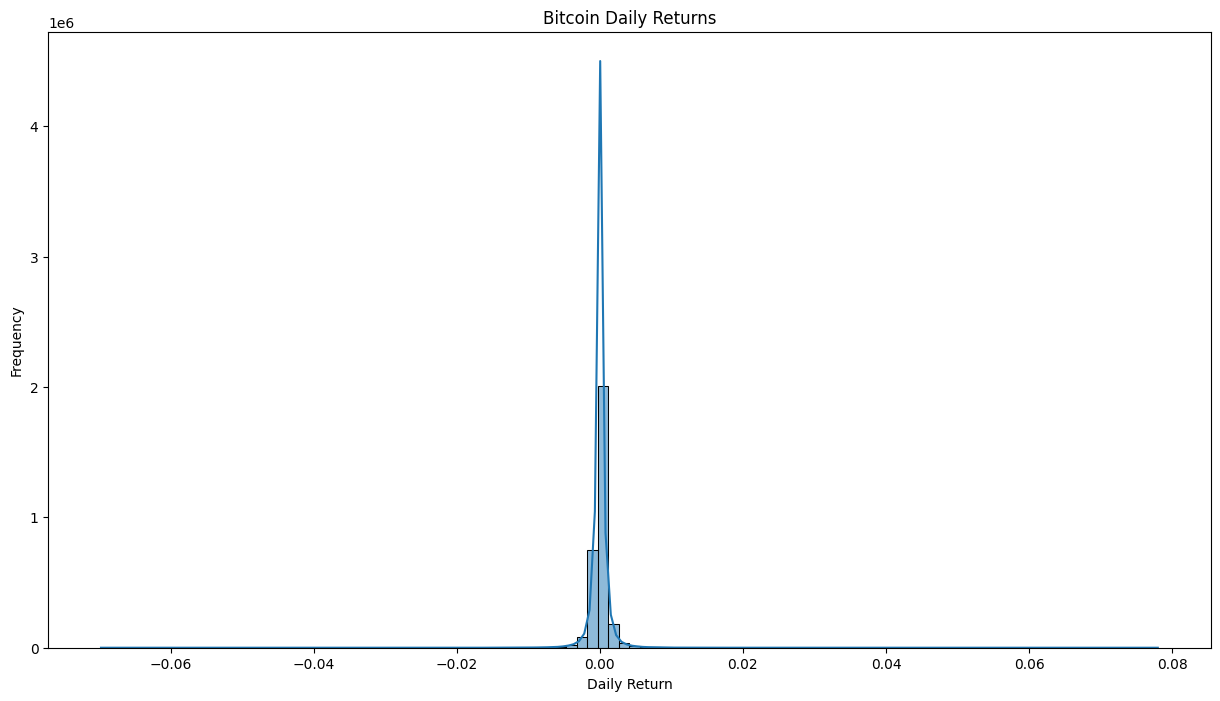

In [90]:
# Create a histogram of the daily returns
plt.figure(figsize=(15,8))
sns.histplot(df['Return'], bins=100, kde=True)
plt.title('Bitcoin Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

The charts above and below show the distribution of returns over said period

A return refers to how the price of an asset changes as time goes by. Returns can be either positive, which means a gain or profit, or negative, indicating a loss. Instead of solely focusing on the price values, return series provide a more convenient way to analyze and understand the investment opportunity.





Text(0.5, 1.0, 'Bitcoin Daily Returns')

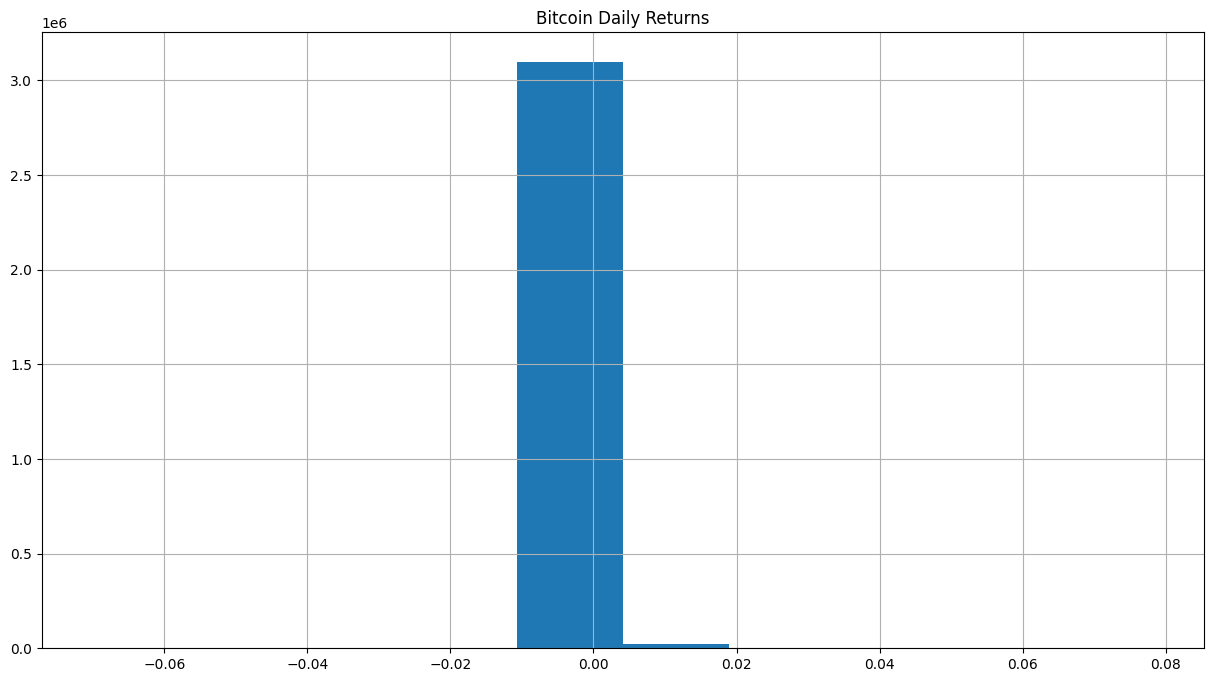

In [91]:
plt.figure(figsize=(15, 8))
df['Return'].hist()
plt.title('Bitcoin Daily Returns')


Text(0.5, 1.0, 'Bitcoin Daily Returns')

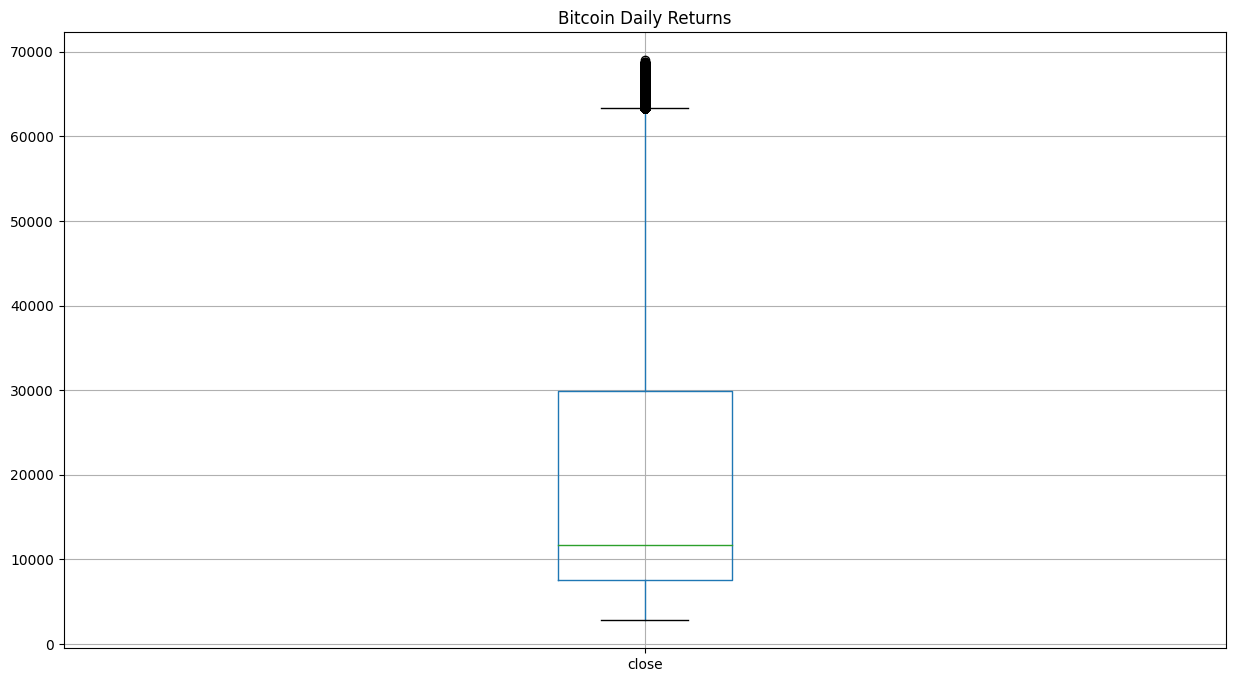

In [92]:
plt.figure(figsize=(15, 8))
df.boxplot(column = 'close');
plt.title('Bitcoin Daily Returns')

To calculate returns, we can rely on the pct_change() function from the pandas library. This function helps us compute the relative price changes of the cryptocurrencies.

In this case, we are looking at the relative price changes of the bitcoin to understand how its value has shifted over time.

**Correlation between indices**



A correlation matrix is a tabular representation that displays the correlation coefficients between multiple variables. It helps to understand the relationships and dependencies between different features in a dataset.

The correlation coefficient is a statistical measure that ranges from -1 to 1. A coefficient of 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable also tends to increase. On the other hand, a coefficient of -1 indicates a strong negative correlation, indicating that as one variable increases, the other variable tends to decrease. A coefficient close to 0 suggests a weak or no correlation between the variables.

By analyzing the correlation matrix, we can identify which features are positively or negatively correlated. This information is useful for various purposes, such as feature selection, identifying redundant features, understanding dependencies between variables, and uncovering potential insights for predictive modeling.

For example, in finance, analyzing the correlation matrix of stock prices can help identify stocks that move together or in opposite directions. This information can be valuable for portfolio diversification and risk management.





Lets get additional information about the data set variables using a  using a heat map or correlation matrix.

It contains values from -1 to 1. Suppose two variables x and y. Let us see the possible causes.

When the correlation between x and y is -1, that means x has a negative correlation with y. It simply means when the value of x increases, the value of y would decrease. The more the value is close to -1, the more will be the negative correlation.
When the correlation between x and y is 0. It means that x and y have no correlation and are independent.
When the correlation between x and y is 1, that means x has a positive correlation with y. Or simply, we can say whenever x increases, y increases too.



<ipython-input-93-250fcd68230e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


Text(0.5, 1.0, 'Correlation heatmap comparing BTC price indices')

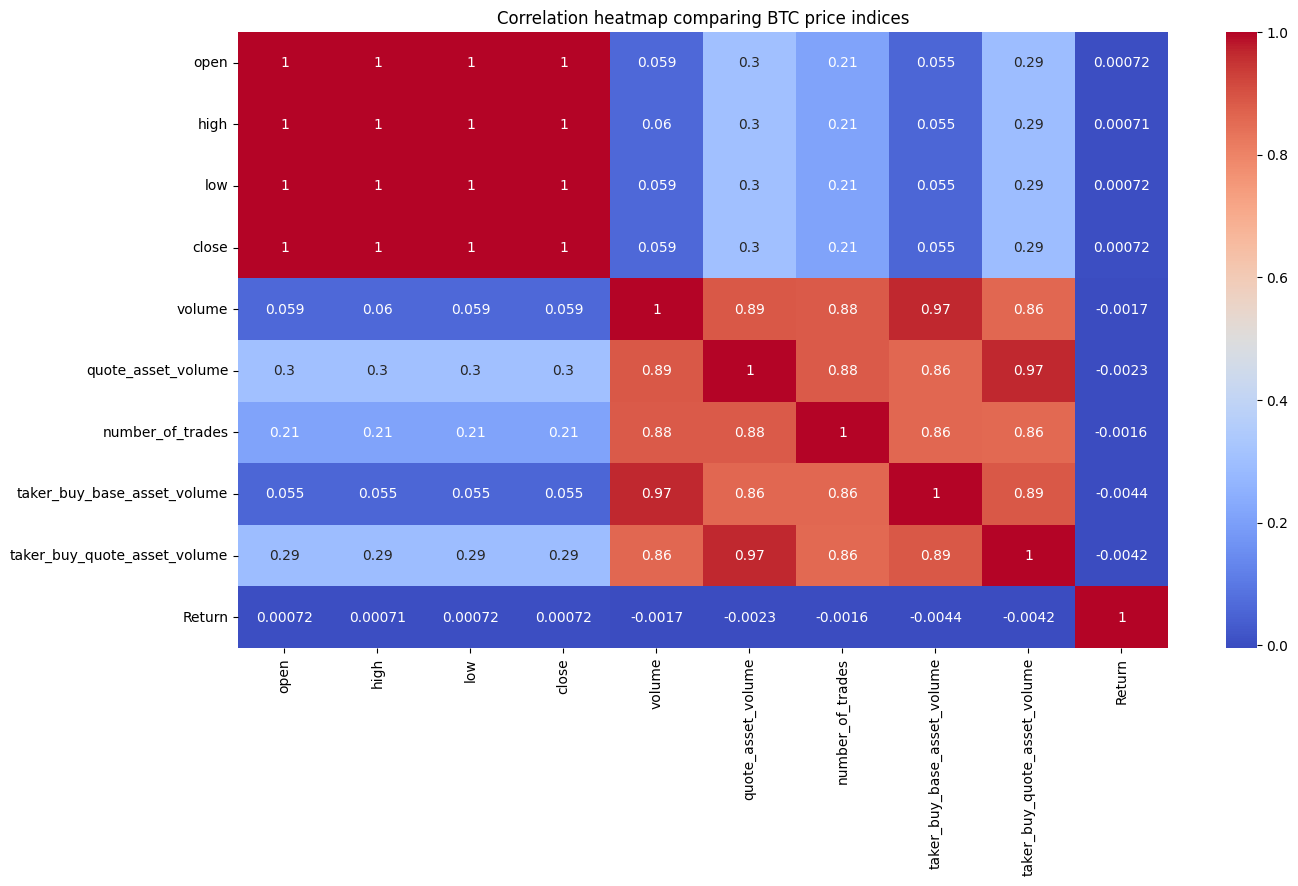

In [93]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation heatmap comparing BTC price indices')

Looking at the heatmap above, we can observe a significant number of 1s and values close to 1. This indicates that these variables have a strong positive correlation and are closely related. This could be due to the fact that there is a relatively small difference between these values. In the cryptocurrency market, even small differences can have a meaningful impact. Therefore, our plan is to introduce new variables into our dataset that capture the difference between these values.

In [94]:
df['open-high'] = df['open']-df['high']
df['open-low'] = df['open'] - df['low']
df['close-high'] = df['close']-df['high']
df['close-low'] = df['close'] - df['low']
df['high-low'] = df['high'] - df['low']
df['open-close'] =df['open'] - df['close']
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,Return,open-high,open-low,close-high,close-low,high-low,open-close
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,NaN,-0.01,0.00,0.00,0.01,0.01,-0.01
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,0.000000,-0.01,0.00,0.00,0.01,0.01,-0.01
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,0.000000,-0.01,6.04,-6.04,0.01,6.05,6.03
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,0.000209,-5.33,0.00,-4.21,1.12,5.33,-1.12
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,-0.000039,-11.42,2.97,-0.01,14.38,14.39,-11.41


We have added 6 new entries to our dataset. We can now create a heatmap with these new values and see their inter-correlation.

From the previous heatmap, we could realize that those values aren’t very useful. So for more clarity, we will drop those values

<ipython-input-95-a437618ace12>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),cmap='coolwarm',annot=True)


Text(0.5, 1.0, 'Correlation heatmap comparing BTC price indices (Edited)')

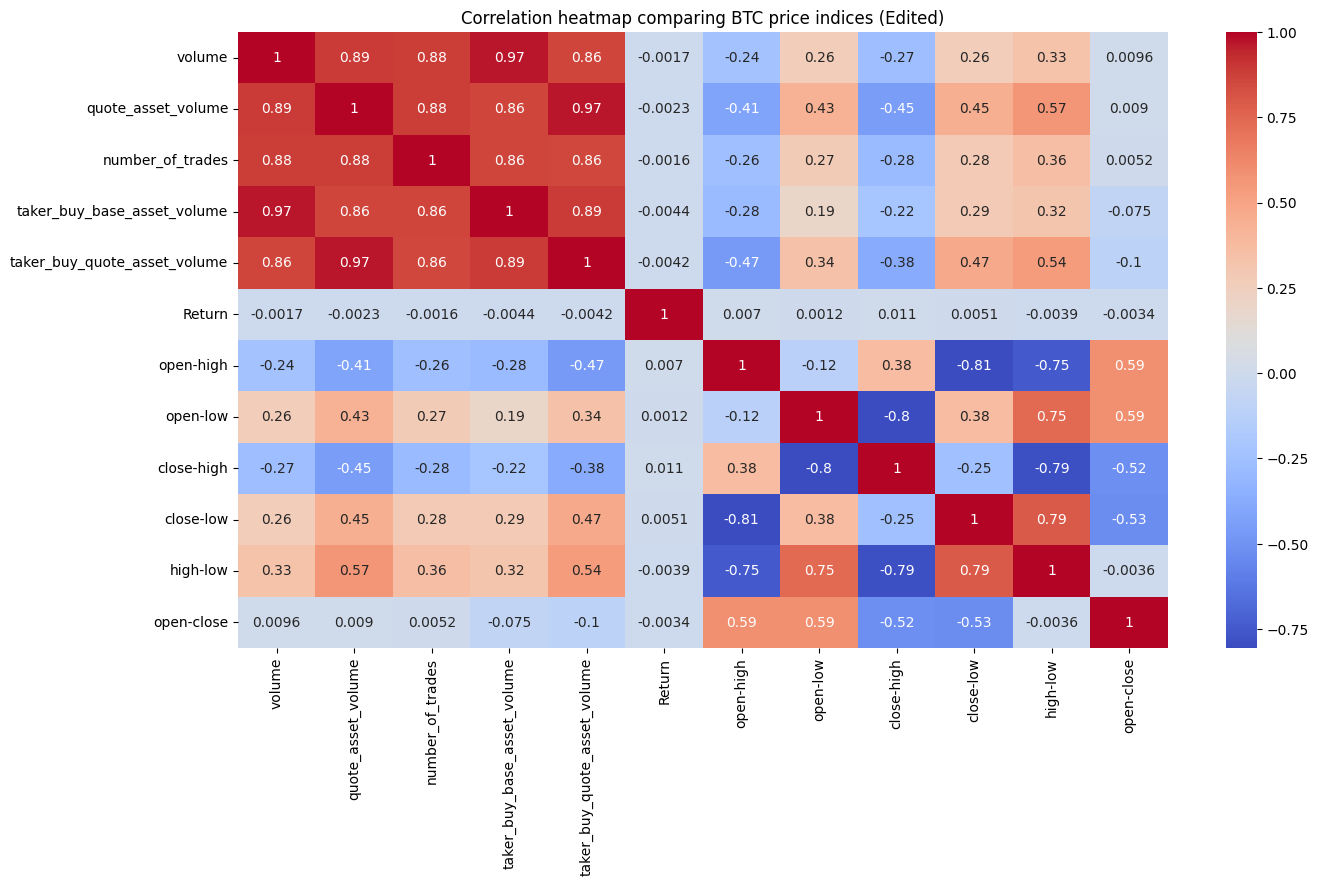

In [95]:
df2 = df.copy()
df2 = df2.drop(['open','high','low','close'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation heatmap comparing BTC price indices (Edited)')

The 'Volume' variable is the main focus in this dataset. Variables with a high correlation to volume suggest they have attracted a significant number of buyers and sellers. Correlation helps us understand how changes in those variables impact Bitcoin traded on a given day.

The 'close-high' variable shows the most negative correlation with volume. This means that a larger difference between the closing and highest Bitcoin values on a day will result in a higher volume of Bitcoin traded.

The 'taker buy base' and 'quote base' variables provide information about the number of buyers and sellers. From this, we can infer that a larger difference between the opening and highest values of a stock may attract more buyers, while a smaller difference may attract more sellers.



# Asking and Answering Questions

By exploring the individual columns of the Bitcoin price dataset, we have already obtained several valuable insights. Now, let's dive deeper by asking specific questions


How many trades occured during the period?

In [96]:
Trades = df.number_of_trades.unique()
len(Trades)

18985

18,985 Unique trades for the period

What is the Average Return ?

In [97]:
np.mean (df['Return'])

2.2656663661133906e-07

*What was the Best Single day gain?*

In [98]:

df['Return'].idxmax()

1780715

What was the worst Single day loss?

In [99]:

df['Return'].idxmin()

1779771

*Bitcoin's highest value in 2017?*

In [100]:
df_2017['high'].max()

19798.68

*Bitcoin's highest value in 2018?*

In [101]:
df_2018['high'].max()

17176.24

*Bitcoin's highest value in 2019?*

In [102]:
df_2019['high'].max()

13970.0

*Bitcoin's highest value in 2020?*

In [103]:
df_2020['high'].max()

29300.0

*Bitcoin's highest value in 2021?*

In [104]:
df_2021['high'].max()

69000.0

*Bitcoin's highest value in 2022?*



In [105]:
df_2022['high'].max()

48189.84

*Bitcoin's highest value in 2023?*

In [106]:
df_2023['high'].max()

31804.2

# Summary and Conclusion

Despite the emergence of smart contract Layer-1 platforms, the article concludes that Bitcoin remains the dominant force in the crypto market capitalization. However, Bitcoin price has waned in most recent years as viewed from the data above.

In 2021, the price of Bitcoin (BTC) reached a new record high, surpassing 65,000 in November. This increase in price was influenced by the introduction of a Bitcoin ETF in the United States.

Other significant events throughout 2021 impacted Bitcoin's price,such as Tesla's announcement in March that it hadinvested 1.5 billion in Bitcoin and the IPO of Coinbase, the largest cryptocurrency exchange in the U.S. These events generated a lot of interest in the market.

However, by the end of 2022, the market had changed significantly. Bitcoin prices dropped to around $27,948.10 in October 2023, following the bankruptcy filing of another crypto exchange called FTX.

The sustainability of Bitcoin is being questioned due to diminishing block rewards, comparatively low transaction fees and an overall lacklustre cryptocurrency market.


# **Future ideas**





*   Predicting Bitcoins future price based on historical data
*   Examine the relationship between two Bitcoin measurements of correlation



source:
image: https://www.businesstoday.in/crypto/token/story/crypto-price-today-bitcoin-holds-27000-polkadot-dogecoin-solana-drop-2-381425-2023-05-16

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://www.analyticsvidhya.com/blog/2021/11/exploratory-data-analysis-on-uber-stocks-dataset/